In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_df = pd.read_csv("../data/data/processed/train_processed.csv")
X_train = train_df.drop(columns=["subject", "activity_id", "activity"])
y_train = train_df["activity"]

In [35]:
model = LogisticRegression(max_iter=500, solver="lbfgs")

n_features_range = [10, 20, 30, 50, 80, 120, 150, 200, 250, 300] 
scores = [] 

for n in n_features_range:
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    score = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='accuracy').mean()

    scores.append(score)
    print(f"  - Atributos: {n}, Acurácia Média (CV): {score:.4f}")

  - Atributos: 10, Acurácia Média (CV): 0.8984
  - Atributos: 20, Acurácia Média (CV): 0.9124
  - Atributos: 30, Acurácia Média (CV): 0.9102
  - Atributos: 50, Acurácia Média (CV): 0.9049


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=80 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 80, Acurácia Média (CV): 0.9036


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=120 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 120, Acurácia Média (CV): 0.9036


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=150 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 150, Acurácia Média (CV): 0.9036


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=200 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 200, Acurácia Média (CV): 0.9036


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=250 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 250, Acurácia Média (CV): 0.9036


c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=300 > n_features=66. There will be no feature selection and all features will be kept.
  warnings.warn(


  - Atributos: 300, Acurácia Média (CV): 0.9036


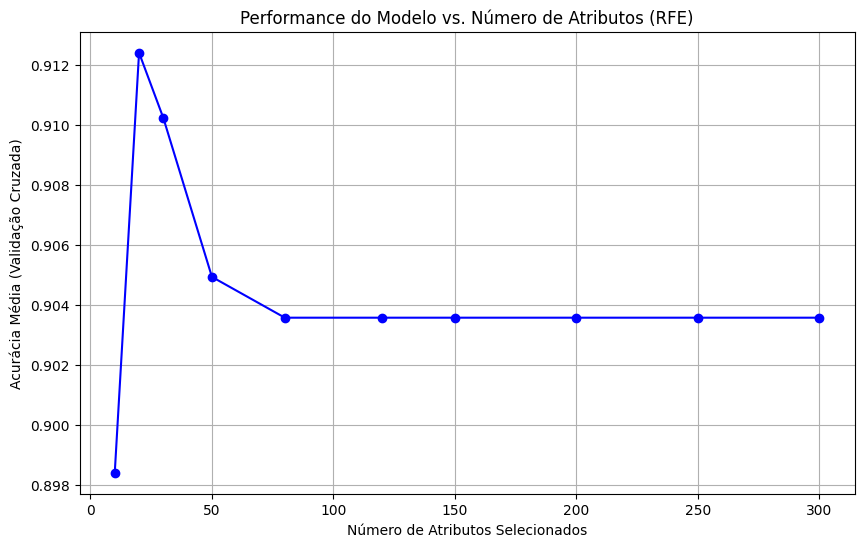

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, scores, marker='o', linestyle='-', color='b')

plt.title("Performance do Modelo vs. Número de Atributos (RFE)")
plt.xlabel("Número de Atributos Selecionados")
plt.ylabel("Acurácia Média (Validação Cruzada)")
plt.grid(True)
plt.show()

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


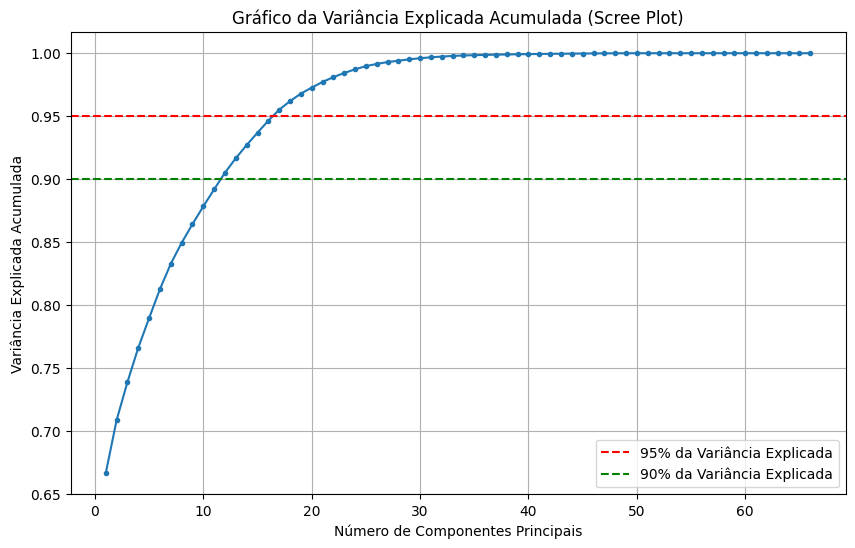

Número de componentes para explicar pelo menos 95% da variância: 17


In [38]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-')

plt.axhline(y=0.95, linestyle='--', color='red', label='95% da Variância Explicada')
plt.axhline(y=0.90, linestyle='--', color='green', label='90% da Variância Explicada')

plt.title('Gráfico da Variância Explicada Acumulada (Scree Plot)')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Número de componentes para explicar pelo menos 95% da variância: {n_components_95}")

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=1000)
lasso_model.fit(X_train_scaled, y_train)

feature_importance = np.sum(np.abs(lasso_model.coef_), axis=0)

c:\Users\Erlanny Rodrigues\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [40]:

coef_df = pd.DataFrame({
    'Atributo': X_train.columns,
    'Importancia': feature_importance
})

non_zero_coefs = coef_df[coef_df['Importancia'] > 0]

non_zero_coefs_sorted = non_zero_coefs.sort_values(by='Importancia', ascending=False)

print(f"O Lasso selecionou {len(non_zero_coefs_sorted)} atributos de um total de {len(coef_df)}.")

O Lasso selecionou 50 atributos de um total de 66.


C:\Users\Erlanny Rodrigues\AppData\Local\Temp\ipykernel_18764\1799583051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Atributo', data=non_zero_coefs_sorted.head(30), palette='viridis')


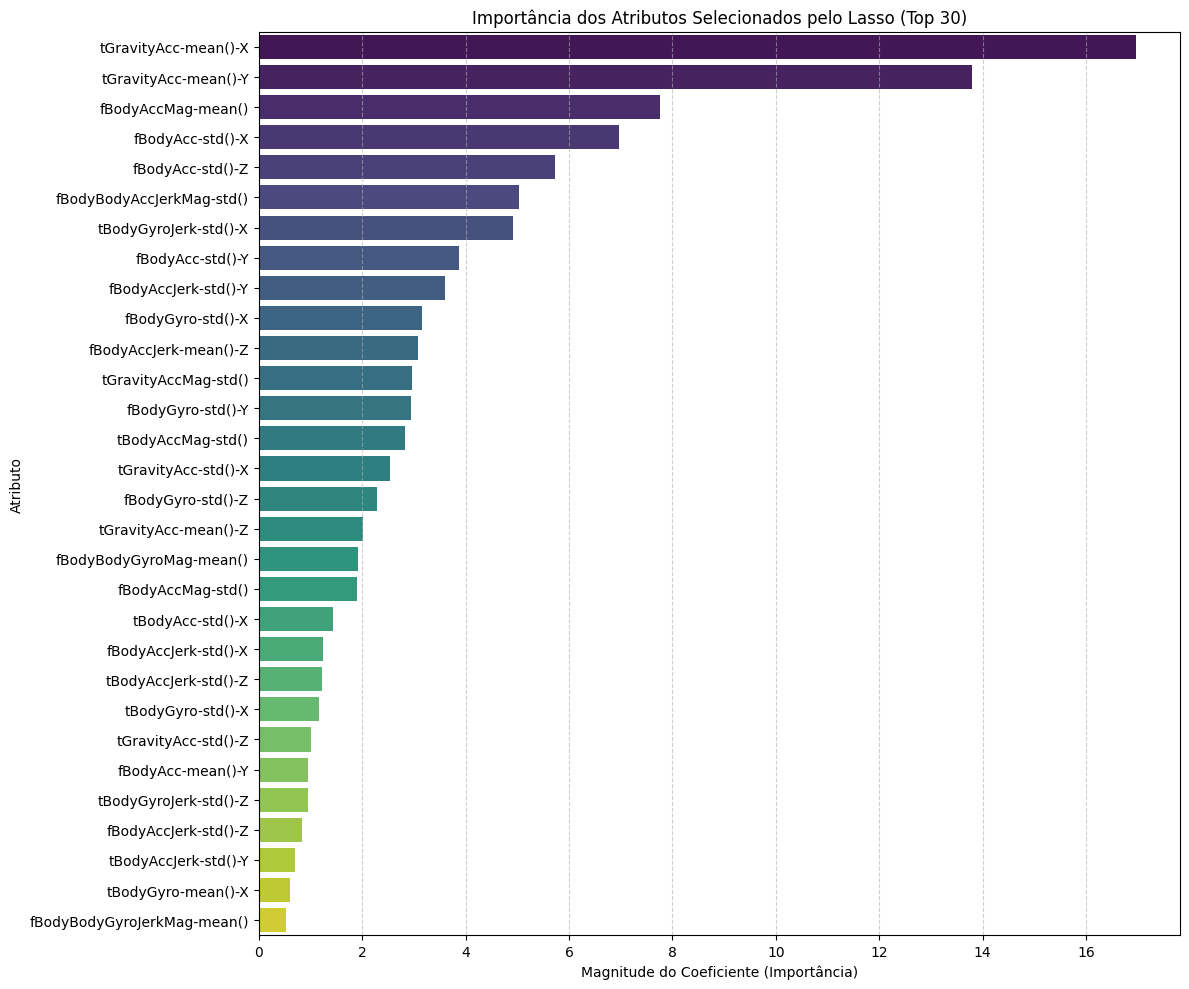

In [41]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Importancia', y='Atributo', data=non_zero_coefs_sorted.head(30), palette='viridis') 

plt.title('Importância dos Atributos Selecionados pelo Lasso (Top 30)')
plt.xlabel('Magnitude do Coeficiente (Importância)')
plt.ylabel('Atributo')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.show()

In [42]:
train_df = pd.read_csv("../data/data/processed/train_processed.csv")
X_train = train_df.drop(columns=["subject", "activity_id", "activity"])
y_train_labels = train_df["activity"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Activity'] = y_train_labels

print(f"Variância explicada pelos 2 componentes: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

Variância explicada pelos 2 componentes: 70.86%


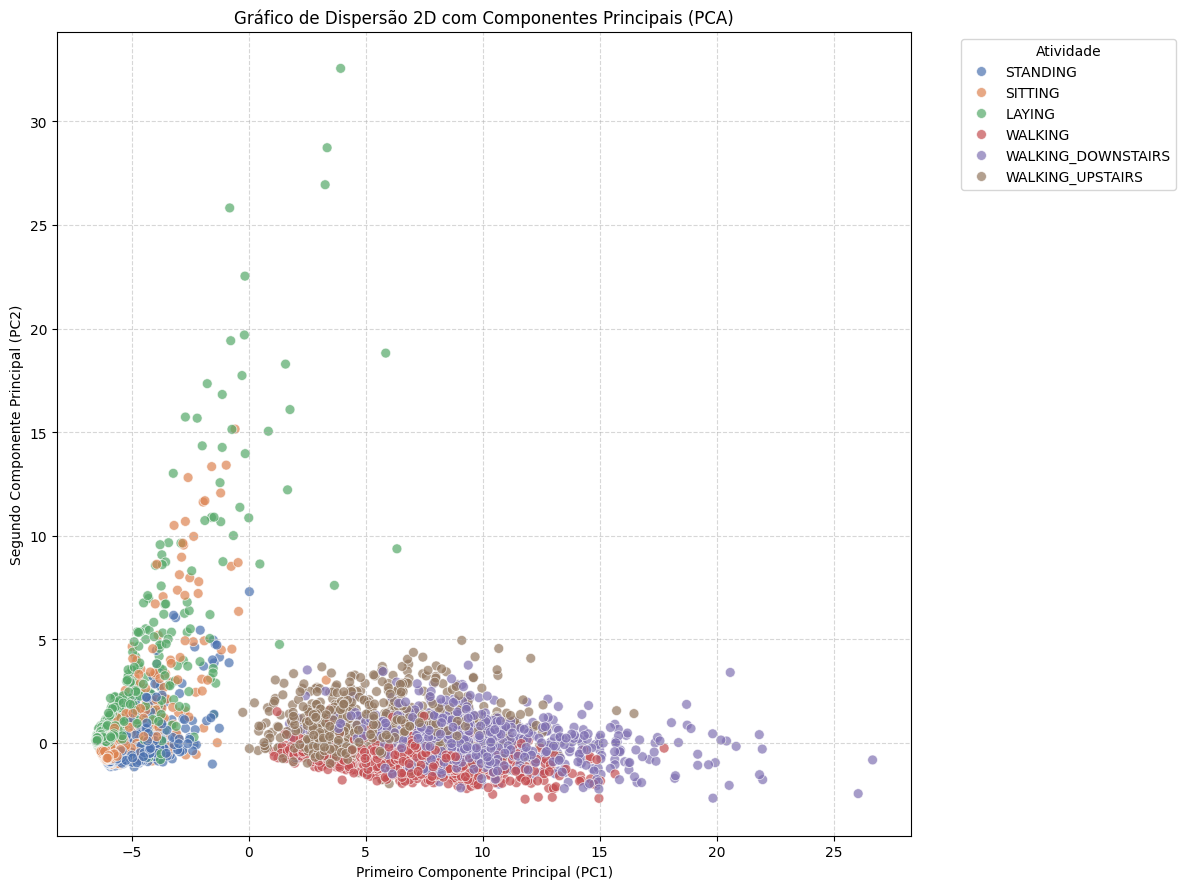

In [43]:
plt.figure(figsize=(12, 9))
sns.scatterplot(
    x="PC1", 
    y="PC2",
    hue="Activity",        
    palette="deep",        
    data=pca_df,
    alpha=0.7,             
    s=50                   
)

plt.title('Gráfico de Dispersão 2D com Componentes Principais (PCA)')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.legend(title='Atividade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
